In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
file_path = "forspeedplot.csv"
df = pd.read_csv(file_path)
df.head()

,interval_begin,pos,interval_harmonicMeanSpeed_attack,interval_harmonicMeanSpeed_base,interval_flow_attack,interval_flow_base,scenario,mean_speed_attack,mean_speed_base,flowrate_attack,flowrate_base
0,600,1000,30.55,30.53,990.0,990.0,500[0.2],68.338517,68.293778,495.0,495.0
1,600,1100,30.59,30.52,990.8,990.8,500[0.2],68.427995,68.271409,495.4,495.4
2,600,1200,30.59,30.54,989.2,989.6,500[0.2],68.427995,68.316148,494.6,494.8
3,600,1300,30.60,30.53,992.4,992.0,500[0.2],68.450364,68.293778,496.2,496.0
4,600,1400,30.59,30.51,994.0,994.0,500[0.2],68.427995,68.249039,497.0,497.0


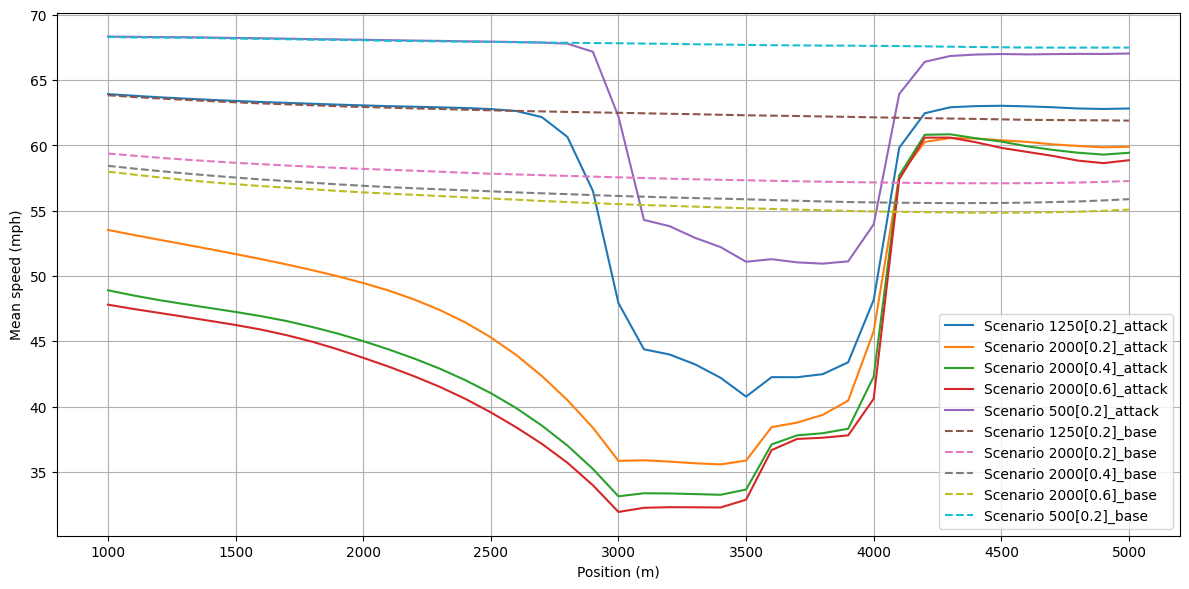

In [10]:
# Compute mean and standard deviation of mean_speed_attack grouped by scenario and pos
stats_by_pos_attack = df.groupby(['scenario', 'pos'])['mean_speed_attack'].agg(['mean', 'std']).reset_index()
stats_by_pos_base = df.groupby(['scenario', 'pos'])['mean_speed_base'].agg(['mean', 'std']).reset_index()

# Plotting with error bars (x-axis: pos)
plt.figure(figsize=(12, 6))

for scenario in stats_by_pos_attack['scenario'].unique():
    subset = stats_by_pos_attack[stats_by_pos_attack['scenario'] == scenario]
    plt.plot(subset['pos'], subset['mean'], label=f'Scenario {scenario}_attack')

for scenario in stats_by_pos_base['scenario'].unique():
    subset = stats_by_pos_base[stats_by_pos_base['scenario'] == scenario]
    plt.plot(subset['pos'], subset['mean'], label=f'Scenario {scenario}_base', linestyle='--')  

# plt.title('Mean Speed (Attack) with Variation Across pos')
plt.xlabel('Position (m)')
plt.ylabel('Mean speed (mph)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_2976371/1576179704.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Set1', len(unique_scenarios))
/tmp/ipykernel_2976371/1576179704.py:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3000, 4000, color='gray', alpha=0.3, hatch='///', edgecolor='black')


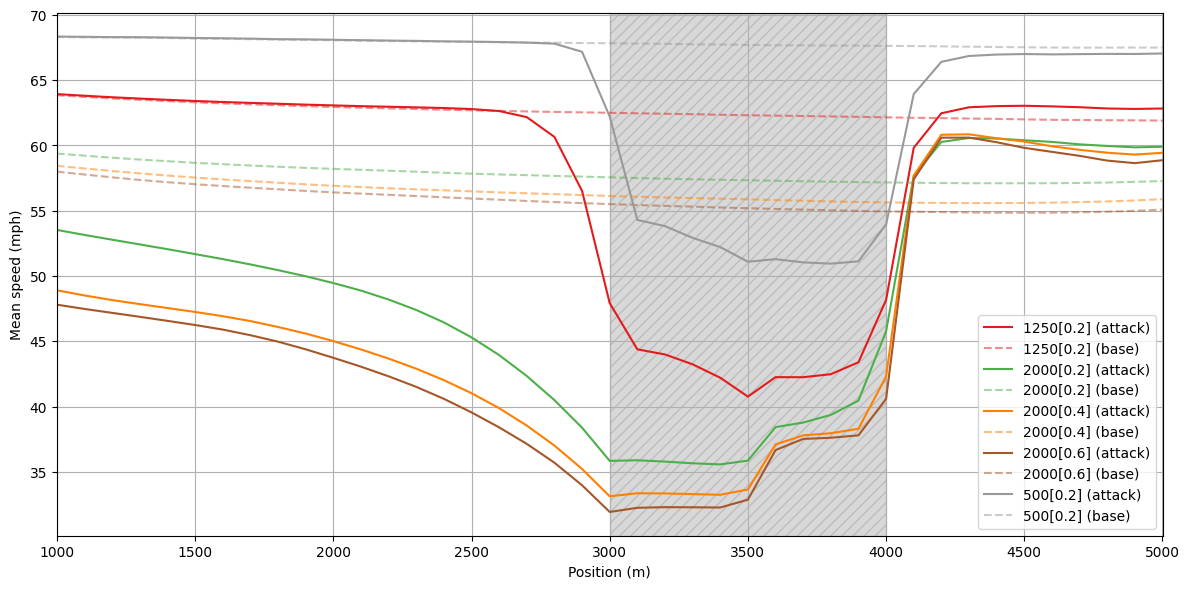

In [47]:
import matplotlib.cm as cm
import numpy as np

# Recalculate the stats as they are not in memory from earlier cells
stats_by_pos_attack = df.groupby(['scenario', 'pos'])['mean_speed_attack'].agg(['mean', 'std']).reset_index()
stats_by_pos_base = df.groupby(['scenario', 'pos'])['mean_speed_base'].agg(['mean', 'std']).reset_index()

# Get unique scenarios and generate a color and marker for each
unique_scenarios = stats_by_pos_attack['scenario'].unique()
colors = cm.get_cmap('Set1', len(unique_scenarios))
# markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'H']

# Plotting with paired style for base and attack
plt.figure(figsize=(12, 6))

for idx,scenario in enumerate(unique_scenarios):
    color = colors(idx)
    # marker = markers[idx % len(markers)]

    attack_subset = stats_by_pos_attack[stats_by_pos_attack['scenario'] == scenario]
    base_subset = stats_by_pos_base[stats_by_pos_base['scenario'] == scenario]

    plt.plot(attack_subset['pos'], attack_subset['mean'],
             label=f'{scenario} (attack)', color=color)

    plt.plot(base_subset['pos'], base_subset['mean'],
             label=f'{scenario} (base)', color=color, linestyle='--', alpha=0.5)

plt.axvspan(3000, 4000, color='gray', alpha=0.3, hatch='///', edgecolor='black')
plt.xlabel('Position (m)')
plt.ylabel('Mean speed (mph)')
plt.xlim(1000, 5000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('speed_plot.png')
plt.show()


/tmp/ipykernel_2976371/3494566629.py:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3000, 4000, color='gray', alpha=0.3, hatch='///', edgecolor='black')


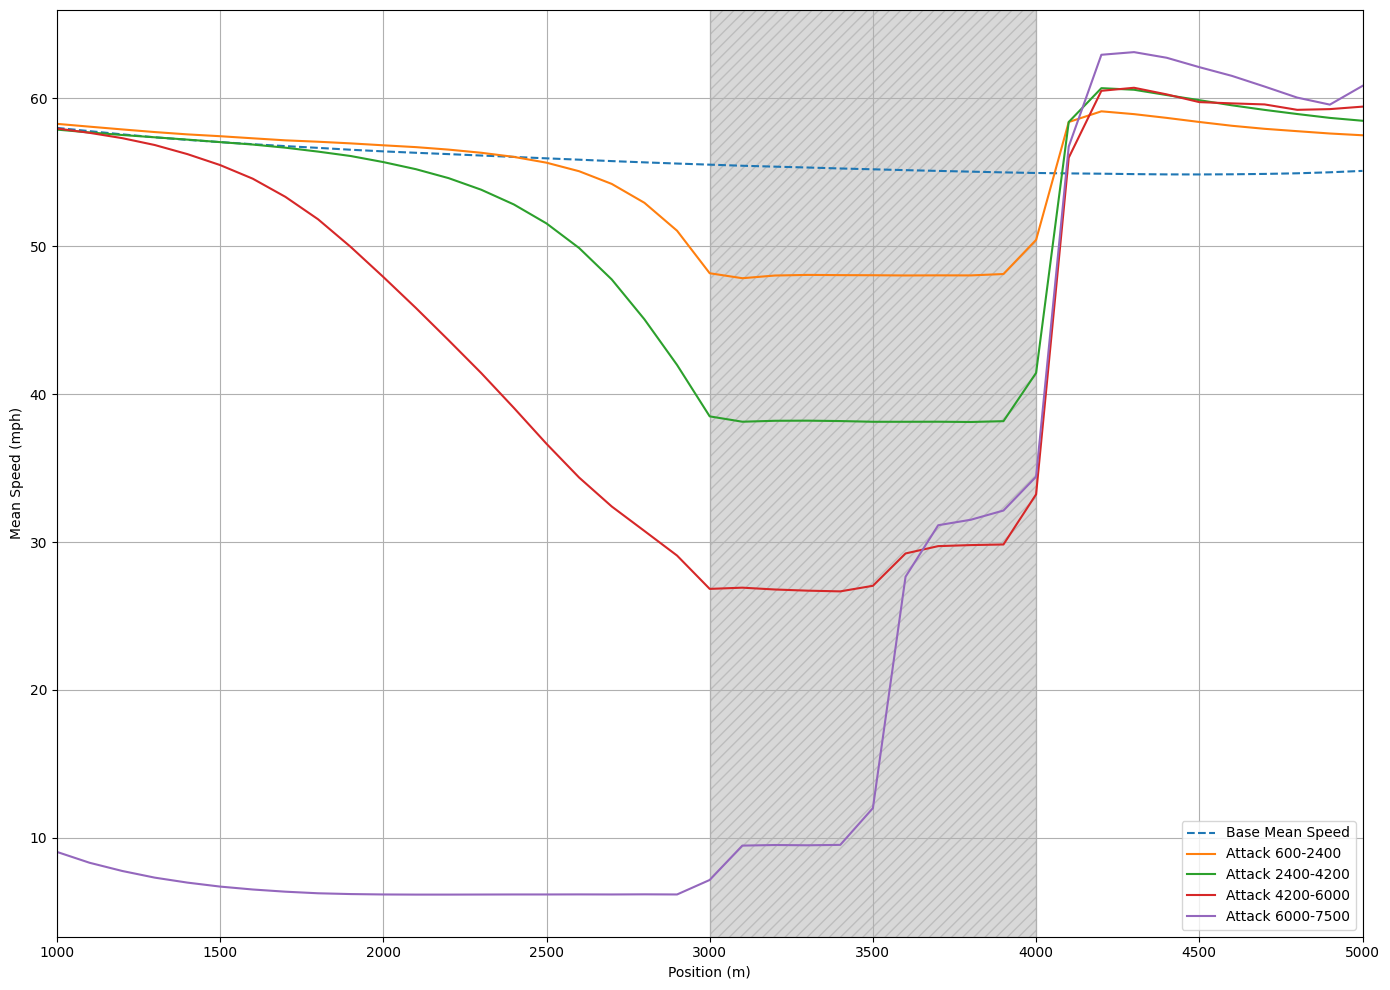

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
file_path = "forspeedplot.csv"
df = pd.read_csv(file_path)
df.head()

# Filter data for scenario '2000[0.6]'
scenario_df = df[df['scenario'] == '2000[0.6]']

# Define the time intervals
time_intervals = [
    (600, 2400),
    (2400, 4200),
    (4200, 6000),
    (6000, 7500)
]

# Start plotting
plt.figure(figsize=(14, 10))

# 1. Plot mean_speed_base
base_stats = scenario_df.groupby('pos')['mean_speed_base'].agg(['mean', 'std']).reset_index()
plt.plot(base_stats['pos'], base_stats['mean'], label='Base Mean Speed', linestyle='--')

# 2-5. Plot mean_speed_attack for each interval
for start, end in time_intervals:
    interval_subset = scenario_df[(scenario_df['interval_begin'] > start) & (scenario_df['interval_begin'] <= end)]
    attack_stats = interval_subset.groupby('pos')['mean_speed_attack'].agg(['mean', 'std']).reset_index()
    plt.plot(attack_stats['pos'], attack_stats['mean'], label=f'Attack {start}-{end}')

plt.axvspan(3000, 4000, color='gray', alpha=0.3, hatch='///', edgecolor='black')

# plt.title('Mean Speed Comparison (Base vs Attack Intervals) for Scenario 2000[0.6]')
plt.xlabel('Position (m)')
plt.ylabel('Mean Speed (mph)')
plt.xlim(1000, 5000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('speed_plot2.png')
plt.show()
